<a href="https://colab.research.google.com/github/swordwalid/Assignment-/blob/main/Assignment_Task_ANTT_Robotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Issues:**
## 1. Dataset lacks a label or feature representing machine health status, impeding supervised learning tasks.
## 2. Domain-specific information about machines and their operation is unavailable, limiting meaningful analysis in unsupervised approaches.

## **Given Tasks:**
## **Data Analysis and Preprocessing**

### Let's Start by importing necessary tools and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Data/Pallet Washing Machine.xlsx')
data.head()


,device,time,Temperature Sensor-1,Vibration Sensor-1,Vibration Sensor-2,Vibration Sensor-3
0,esp32_001,2022-11-08T09:34:57.8310000Z,20.797449,2147483647,4758,2147483647
1,esp32_001,2022-11-08T09:35:03.3310000Z,21.683039,7056,4590,2147483647
2,esp32_001,2022-11-08T09:35:08.6130000Z,21.838221,4465,6405,2147483647
3,esp32_001,2022-11-08T09:35:14.1130000Z,21.855524,3699,935,2147483647
4,esp32_001,2022-11-08T09:35:19.3800000Z,21.700251,2269,266,447


In [ ]:
# Finding out the features(columns) and corresponding datatypes in our data
for col in data.columns:
  print(col)
print("data types:\n",data.dtypes)

device
time
Temperature Sensor-1
Vibration Sensor-1
Vibration Sensor-2
Vibration Sensor-3
data types:
 device                   object
time                     object
Temperature Sensor-1    float64
Vibration Sensor-1        int64
Vibration Sensor-2        int64
Vibration Sensor-3        int64
dtype: object


##### Here we will check for missing values in our entire data

In [ ]:
# Here we will check for missing values in our entire data
null=pd.isnull(data)
null.sum().sum()

0

In [ ]:
missing_vals=['NA','',None,np.NaN]
missing=data.isin(missing_vals)
missing.sum().sum()

0

### **Comment: There is no missing values (null, NA,' ',None or NaN) in our data**

#### In this section we will check for outliers and handling outliers

### we will check outliers for each individual column/feature.

###  At first we are taking Temperature Sensor-1 column/featue.

In [ ]:
data[data['Temperature Sensor-1'].isnull()]  #check for empty values in this feature.

,device,time,Temperature Sensor-1,Vibration Sensor-1,Vibration Sensor-2,Vibration Sensor-3


In [ ]:
data['Temperature Sensor-1'].describe() # understanding the statistical summary of this feature

count    7600.000000
mean       37.338332
std        27.058924
min         1.588312
25%        26.450861
50%        34.867775
75%        41.796074
max       276.644318
Name: Temperature Sensor-1, dtype: float64

#### comment: IQR is approximately 15.34 units (41.80 - 26.46) and 1.5 times the IQR is approximately 23.01 units. Adding this to the third quartile gives us 64.81 **which is far below the maximum value of 276.64 units(which is likely an outlier so we need to handle this value).**


##### Now we will visualize this issue for better understanding

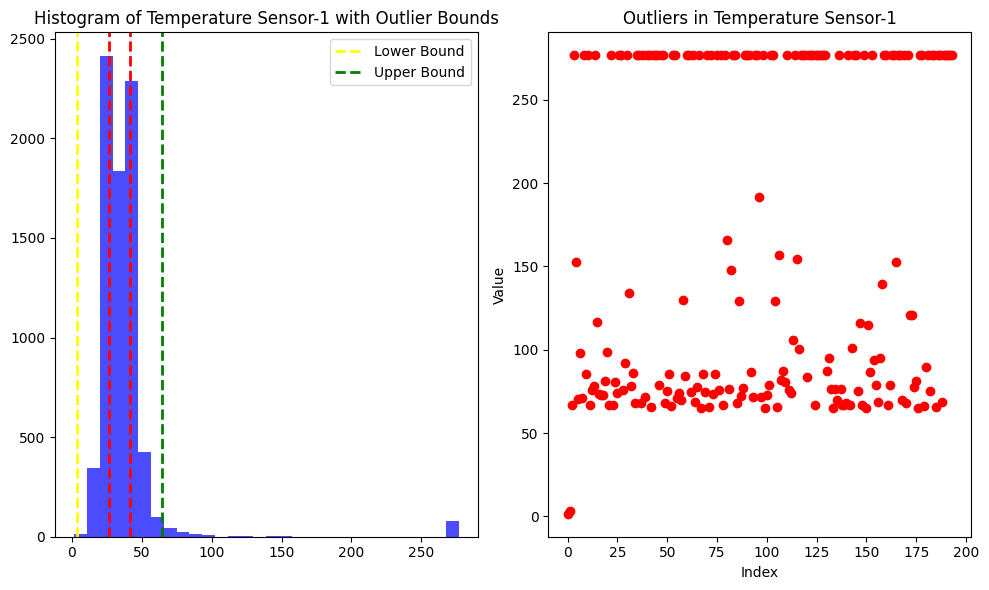

Outlier values:
1237      1.588312
1264      3.395349
1376     66.996147
1423    276.644318
1433    152.696198
           ...    
6736    276.644318
6744    276.644318
6765    276.644318
6788    276.644318
6841    276.644318
Name: Temperature Sensor-1, Length: 194, dtype: float64


In [ ]:
sensor_data = data['Temperature Sensor-1']

Q1 = sensor_data.quantile(0.25) #25th percentile
Q3 = sensor_data.quantile(0.75) #75th percentile
IQR = Q3 - Q1 #interquartile range
# Defineing  outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sensor_data[(sensor_data < lower_bound) | (sensor_data > upper_bound)] #finding out the outliers

plt.figure(figsize=(10, 6)) # Ploting the results

# we  are plotting the original data
plt.subplot(1, 2, 1)
plt.hist(sensor_data, bins=30, color='blue', alpha=0.7)
plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2)
plt.axvline(Q3, color='red', linestyle='dashed', linewidth=2)
plt.axvline(lower_bound, color='yellow', linestyle='dashed', linewidth=2, label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Upper Bound')
plt.title('Histogram of Temperature Sensor-1 with Outlier Bounds')
plt.legend()

# The following code plots the outliers
plt.subplot(1, 2, 2)
plt.scatter(range(len(outliers)), outliers, color='red')
plt.title('Outliers in Temperature Sensor-1')
plt.xlabel('Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()
print("Outlier values:")
print(outliers)

##### **comment:** Combining insights from both graphs we see that  a bar(in histogram freq. distribution) **in rightmost end (near 275 units) and some values are beyond lower bound confirms the presence of extreme outliers in the data.This could be a result of an error so we need to handle these outliers.**

##### **Possible Solution:** Here we see duplicate outliers from above graphs.we will replace these by mean of the non-outlier values.

In [ ]:
# Program to replace extreme outliers by mean of the non-outlier values.
Q1 = data['Temperature Sensor-1'].quantile(0.25)
Q3 = data['Temperature Sensor-1'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

non_outlier_mean = data[(data['Temperature Sensor-1'] >= lower_bound) & (data['Temperature Sensor-1'] <= upper_bound)]['Temperature Sensor-1'].mean() # Finding out non-outlier mean

data.loc[data['Temperature Sensor-1'] < lower_bound, 'Temperature Sensor-1'] = non_outlier_mean # Replacing values below the lower bound with the non-outlier mean


data.loc[data['Temperature Sensor-1'] > upper_bound, 'Temperature Sensor-1'] = non_outlier_mean # Replaceing values above the upper bound with the non-outlier mean


#### Now let's finds out histogram frequency distribution and data distribution of our processed feature data:

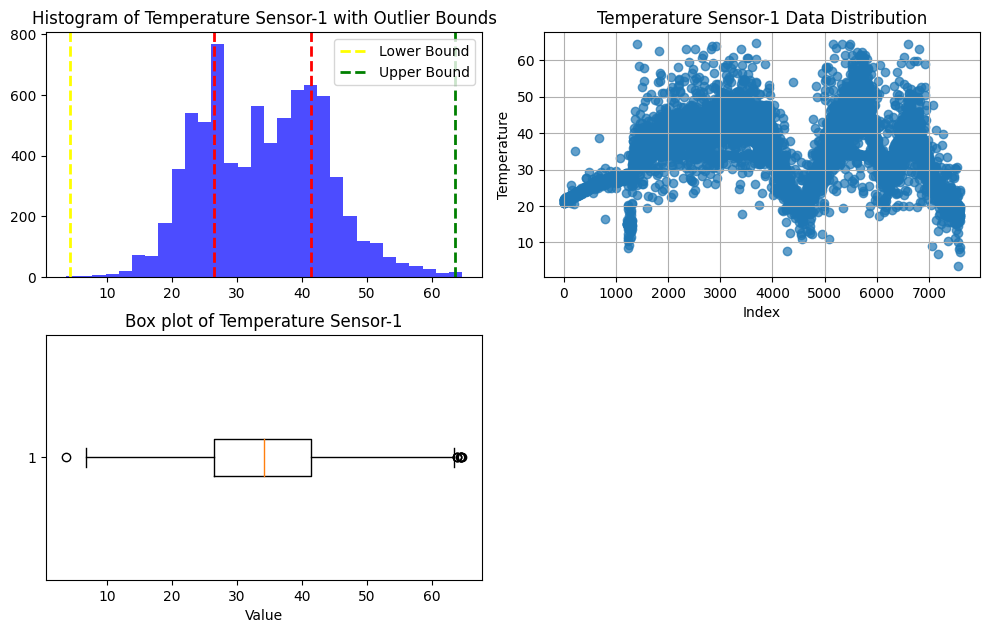

In [ ]:
sensor_data = data['Temperature Sensor-1']

Q1 = sensor_data.quantile(0.25) #25th percentile
Q3 = sensor_data.quantile(0.75) #75th percentile
IQR = Q3 - Q1 #interquartile range
# Defineing  outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sensor_data[(sensor_data < lower_bound) | (sensor_data > upper_bound)] #finding out the outliers

plt.figure(figsize=(10, 6)) # Ploting the results

# we  are plotting the original data
plt.subplot(2, 2, 1)
plt.hist(sensor_data, bins=30, color='blue', alpha=0.7)
plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2)
plt.axvline(Q3, color='red', linestyle='dashed', linewidth=2)
plt.axvline(lower_bound, color='yellow', linestyle='dashed', linewidth=2, label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Upper Bound')
plt.title('Histogram of Temperature Sensor-1 with Outlier Bounds')
plt.legend()

# we will use scatter plot to see data distribution after handling outliers
plt.subplot(2, 2, 2)
plt.scatter(range(len(sensor_data)), sensor_data, alpha=0.7)
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.title("Temperature Sensor-1 Data Distribution")
plt.grid(True)
plt.tight_layout()

# box plot for understading data distribution after handling of outliers
plt.subplot(2, 2, 3)
plt.boxplot(sensor_data, vert=False)
plt.title('Box plot of Temperature Sensor-1')
plt.xlabel('Value')
plt.show()



##### **Comment: potential outliers beyond the upper bound and lower bound are now mostly elimainated and data distribution looks fresh and okay further processing!!**




### Here we will define some Generalized functions to analyze data distribution and handling outliers and significant issues in data

In [ ]:
# Generalized function to detect and visualize outliers
def find_outliers(data, sensor_name="default_sensor"):
    if not isinstance(data, pd.DataFrame):
        raise TypeError("`data` must be a pandas DataFrame.")
    if not isinstance(sensor_name, str):
        raise TypeError("`sensor_name` must be a string.")
    sensor_data = data[sensor_name]
    Q1 = sensor_data.quantile(0.25)
    Q3 = sensor_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = sensor_data[(sensor_data < lower_bound) | (sensor_data > upper_bound)]

    plt.figure(figsize=(10, 6))

    # histogram of original data
    plt.subplot(1, 2, 1)
    plt.hist(sensor_data, bins=30, color='blue', alpha=0.7)
    plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(Q3, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(lower_bound, color='yellow', linestyle='dashed', linewidth=2, label='Lower Bound')
    plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Upper Bound')
    plt.title(f"Histogram of {sensor_name} with Outlier Bounds")
    plt.legend()

    # scatter plot of outlier
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(outliers)), outliers, color='red')
    plt.title(f"Outliers in {sensor_name}")
    plt.xlabel('Index')
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()
    print("Outlier values:")
    print(outliers)


In [ ]:
# Program to replace extreme outliers by mean of the non-outlier values.
def handling_outliers(data, sensor_name="default_sensor"):

    if not isinstance(data, pd.DataFrame):
        raise TypeError("`data` must be a pandas DataFrame.")
    if not isinstance(sensor_name, str):
        raise TypeError("`sensor_name` must be a string.")

    sensor_data = data[sensor_name]
    Q1 = sensor_data.quantile(0.25)
    Q3 = sensor_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = sensor_data[(sensor_data < lower_bound) | (sensor_data > upper_bound)]
    non_outlier_mean = sensor_data.loc[(sensor_data >= lower_bound) & (sensor_data <= upper_bound)].mean()
    sensor_data.loc[outliers.index] = non_outlier_mean


In [ ]:
# function to check data distribution after outliers handling
def check_data_distribution(data, sensor_name="default_sensor", plot=True):

    if not isinstance(data, pd.DataFrame):
        raise TypeError("`data` must be a pandas DataFrame.")
    if not isinstance(sensor_name, str):
        raise TypeError("`sensor_name` must be a string.")
    sensor_data = data[sensor_name]
    Q1 = sensor_data.quantile(0.25)
    Q3 = sensor_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = sensor_data[(sensor_data < lower_bound) | (sensor_data > upper_bound)]
    if plot:
        plt.figure(figsize=(12, 8))

        # Original data histogram
        plt.subplot(2, 3, 1)
        plt.hist(sensor_data, bins=30, color='blue', alpha=0.7)
        plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2)
        plt.axvline(Q3, color='red', linestyle='dashed', linewidth=2)
        plt.axvline(lower_bound, color='yellow', linestyle='dashed', linewidth=2, label='Lower Bound')
        plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Upper Bound')
        plt.title(f"Histogram of {sensor_name} with Outlier Bounds")
        plt.legend()

        # Data distribution scatter plot
        plt.subplot(2, 3, 2)
        plt.scatter(range(len(sensor_data)), sensor_data, alpha=0.7)
        plt.xlabel("Index")
        plt.ylabel(f"{sensor_name} Value")
        plt.title(f"{sensor_name} Data Distribution")
        plt.grid(True)

        # Box plot
        plt.subplot(2, 3, 3)
        plt.boxplot(sensor_data, vert=False)
        plt.title(f"Box Plot of {sensor_name}")
        plt.xlabel(f"{sensor_name} Value")
        plt.tight_layout()
        plt.show()



 ### Now We will Process Vibration Sensor-1	data

In [ ]:
print(data[data['Vibration Sensor-1'].isnull()] ) #check for empty values in this feature.
data['Vibration Sensor-1'].describe() # understanding the statistical summary of this feature

Empty DataFrame
Columns: [device, time, Temperature Sensor-1, Vibration Sensor-1, Vibration Sensor-2, Vibration Sensor-3]
Index: []


count    7.600000e+03
mean     8.501951e+05
std      4.266051e+07
min      9.400000e+01
25%      4.940000e+02
50%      1.145500e+03
75%      4.593250e+03
max      2.147484e+09
Name: Vibration Sensor-1, dtype: float64

##### **Comment: Analysing Minimum,Minimum and Standard Deviation we can say that the presence of such a high values suggests that there may be outliers or erroneous entries in the data.**

 ###### Visualising and finding possible outliers

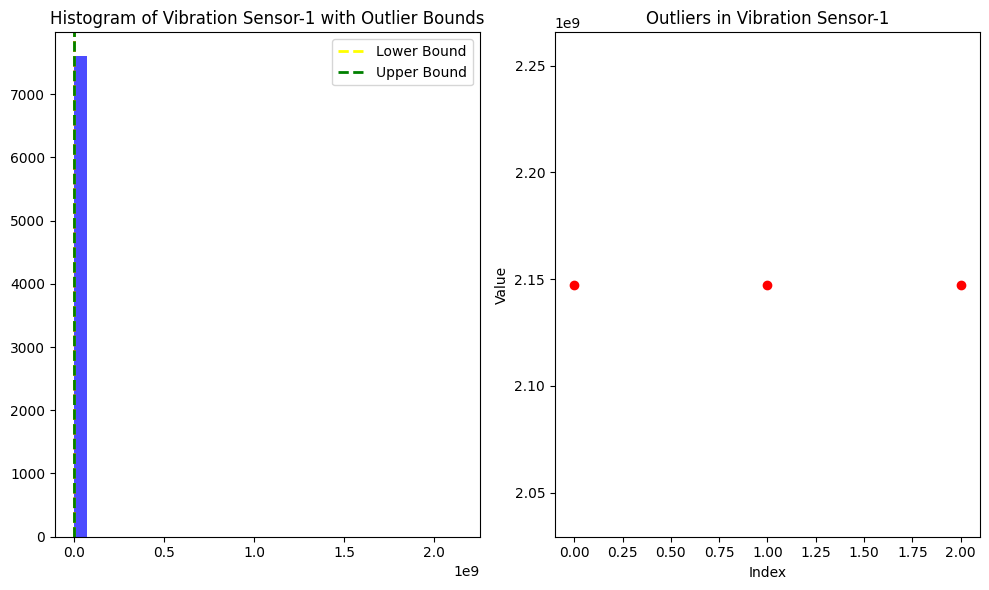

Outlier values:
0       2147483647
990     2147483647
1054    2147483647
Name: Vibration Sensor-1, dtype: int64


In [ ]:
# finding outliers for Vibration Sensor-1
find_outliers(data, sensor_name="Vibration Sensor-1")

##### ***comment: These outliers are few in number but extreme in magnitude, which will heavily skew the mean and inflate the standard deviation.***

In [ ]:
# handling outliers for Vibration Sensor-1
handling_outliers(data, sensor_name="Vibration Sensor-1")

<ipython-input-161-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


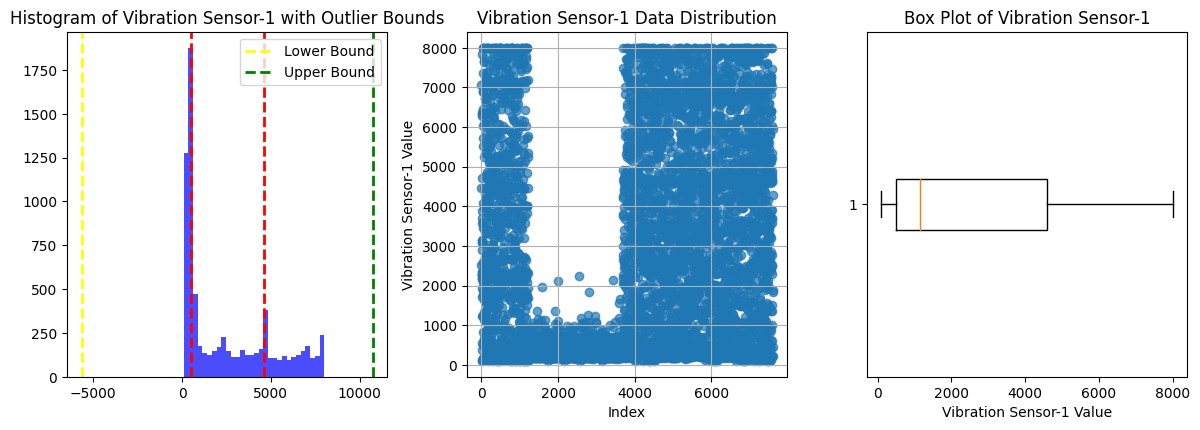

In [ ]:
# check data distribution after handling outliers.
check_data_distribution(data, sensor_name="Vibration Sensor-1")


#### ***outliers are now removed and data looks fresh!***

#### **Now We will Process Vibration Sensor-2 data**

In [ ]:
print(data[data['Vibration Sensor-2'].isnull()]) #check for empty values in this feature.


Empty DataFrame
Columns: [device, time, Temperature Sensor-1, Vibration Sensor-1, Vibration Sensor-2, Vibration Sensor-3]
Index: []


In [ ]:
missing_vals=['NA','',None,np.NaN]
missing=data['Vibration Sensor-2'].isin(missing_vals)
print("Number of missing values:" ,missing.sum().sum())

Number of missing values: 0


In [ ]:
data['Vibration Sensor-2'].describe() # understanding the statistical summary of this feature

count    7.600000e+03
mean     1.415110e+06
std      5.506724e+07
min      3.100000e+01
25%      3.610000e+02
50%      8.695000e+02
75%      4.454000e+03
max      2.147484e+09
Name: Vibration Sensor-2, dtype: float64

### **comment:  Analysing Minimum,Minimum and Standard Deviation we can say that this feature is largely affected by extremely large outliers.**

### Finding out outliers and Handling outliers and other major issues if needed.

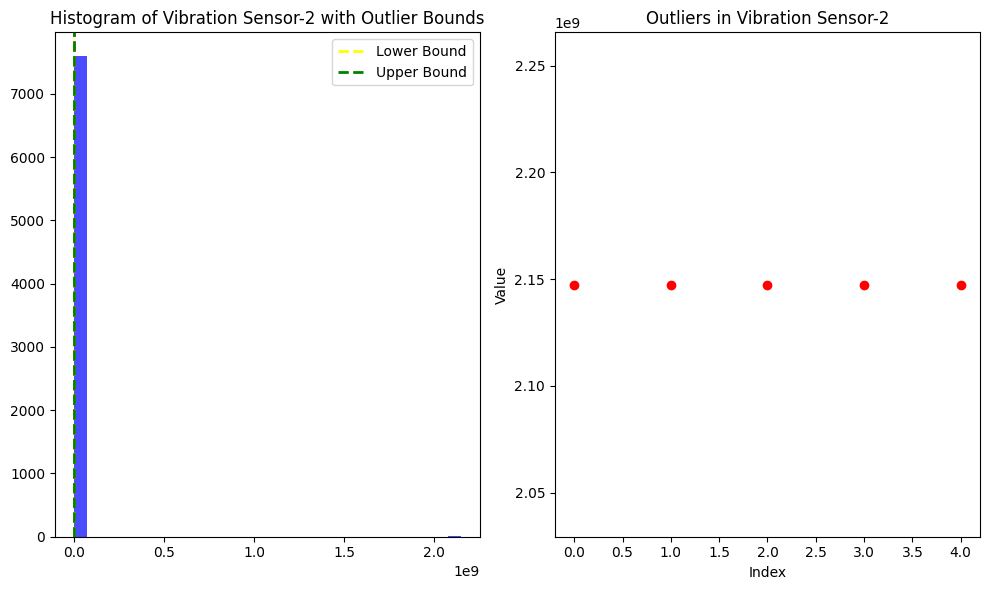

Outlier values:
14     2147483647
18     2147483647
202    2147483647
203    2147483647
246    2147483647
Name: Vibration Sensor-2, dtype: int64


In [ ]:
# finding outliers for Vibration Sensor-2
find_outliers(data, sensor_name="Vibration Sensor-2")

#### **To handle outliers,outliers replaced  by mean value of existing non outliers values.** We can use median instead of mean.

In [ ]:
# handling outliers for Vibration Sensor-2
handling_outliers(data, sensor_name="Vibration Sensor-2")

<ipython-input-161-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


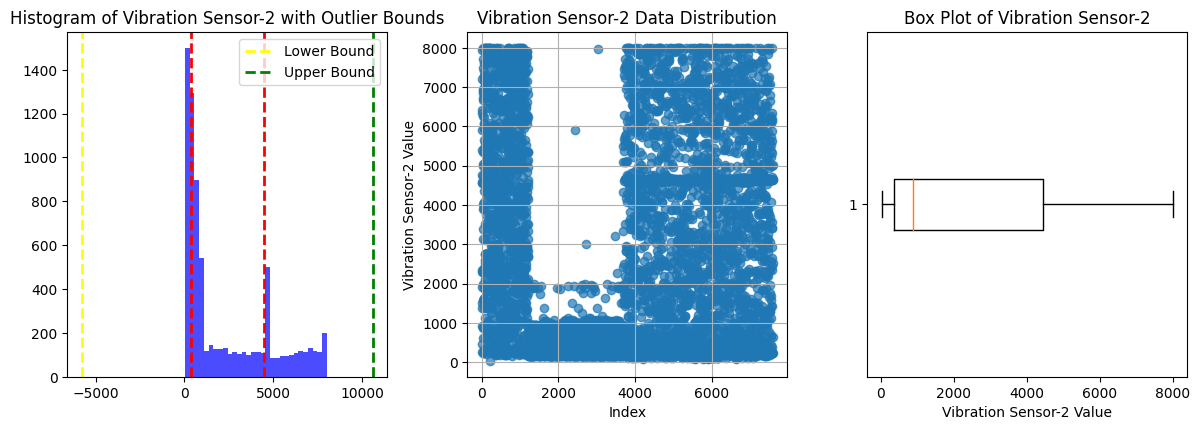

In [ ]:
# check data distribution after handling outliers.
check_data_distribution(data, sensor_name="Vibration Sensor-2")

### **Now it's okay for futher processing**

##### **Now We will Process our last feature "Vibration Sensor-3" data**

###### First we will check for missing values.

In [ ]:
print(data[data['Vibration Sensor-3'].isnull()]) #check for empty values in this feature.


Empty DataFrame
Columns: [device, time, Temperature Sensor-1, Vibration Sensor-1, Vibration Sensor-2, Vibration Sensor-3]
Index: []


In [ ]:
missing_vals=['NA','',None,np.NaN]
missing=data['Vibration Sensor-3'].isin(missing_vals)
print("Number of missing values:" ,missing.sum().sum())

Number of missing values: 0


In [ ]:
# understanding the Data.

In [ ]:
data['Vibration Sensor-3'].describe()

count    7.600000e+03
mean     2.687197e+08
std      7.105798e+08
min      3.100000e+01
25%      3.807500e+02
50%      6.325000e+02
75%      4.690000e+03
max      2.147484e+09
Name: Vibration Sensor-3, dtype: float64

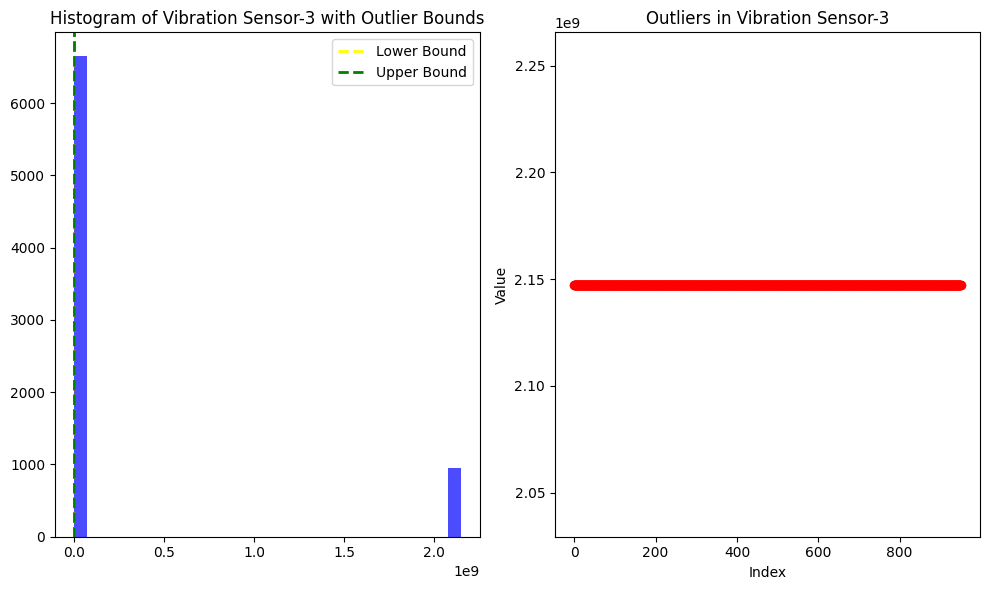

Outlier values:
0       2147483647
1       2147483647
2       2147483647
3       2147483647
5       2147483647
           ...    
1208    2147483647
1209    2147483647
1210    2147483647
1211    2147483647
1213    2147483647
Name: Vibration Sensor-3, Length: 951, dtype: int64


In [ ]:
# finding outliers for Vibration Sensor-3
find_outliers(data, sensor_name="Vibration Sensor-3")

In [ ]:
# handling outliers for Vibration Sensor-3
handling_outliers(data, sensor_name="Vibration Sensor-3")

<ipython-input-161-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


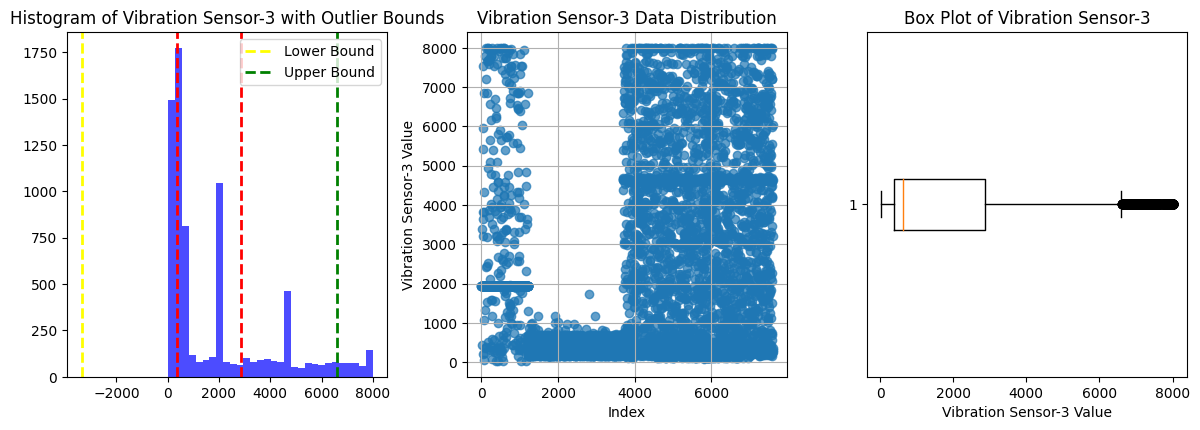

In [ ]:
# check data distribution after handling outliers.
check_data_distribution(data, sensor_name="Vibration Sensor-3")

## **Comment:** Here we see from box plot that a significant number of outliers exists but from data distribution graph and previous statistical analysis  we can say that these values might be useful, **As no information is provided about the corresponding 'current machine status' and individual sensor optimal values. So we won't do any further preprocessing to handle these existing outliers after primary handling of outliers.**

## Let's Plot and Understand the characteristics of the data.


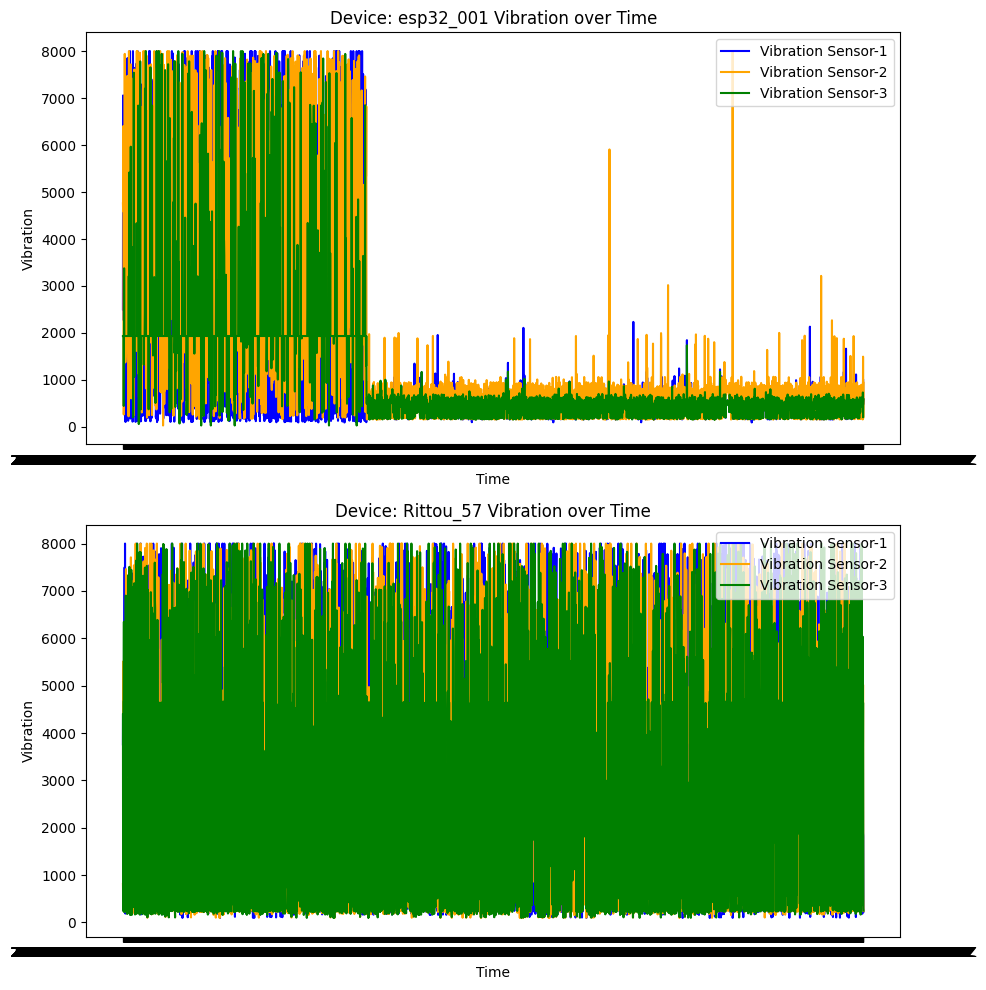

In [ ]:
# Program to find device vs vibration over time
unique_devices = data['device'].unique()
num_devices = len(unique_devices)

fig, axs = plt.subplots(num_devices, 1, figsize=(10, 5 * num_devices))

if num_devices == 1:
    axs = [axs]

for i, device in enumerate(unique_devices):

    device_data = data[data['device'] == device]

    # Plotting Vibration Sensor data over time for the current device
    axs[i].plot(device_data['time'], device_data['Vibration Sensor-1'], label='Vibration Sensor-1', color='blue')
    axs[i].plot(device_data['time'], device_data['Vibration Sensor-2'], label='Vibration Sensor-2', color='orange')
    axs[i].plot(device_data['time'], device_data['Vibration Sensor-3'], label='Vibration Sensor-3', color='green')

    axs[i].set_title(f'Device: {device} Vibration over Time')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Vibration')
    axs[i].legend(loc='upper right')
plt.tight_layout()
plt.show()


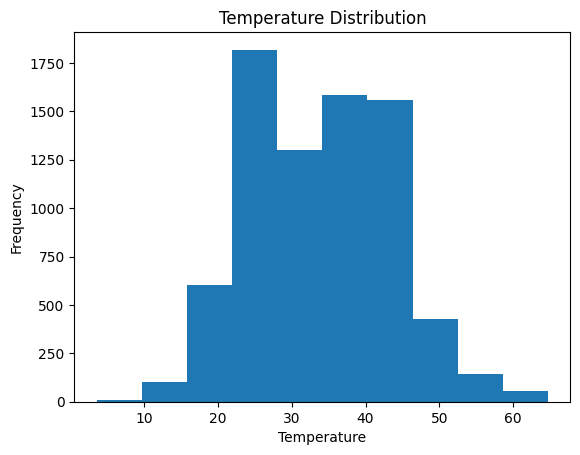

In [ ]:
# @title Temperature Distribution
plt.hist(data['Temperature Sensor-1'], bins=10)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
_ = plt.title('Temperature Distribution')

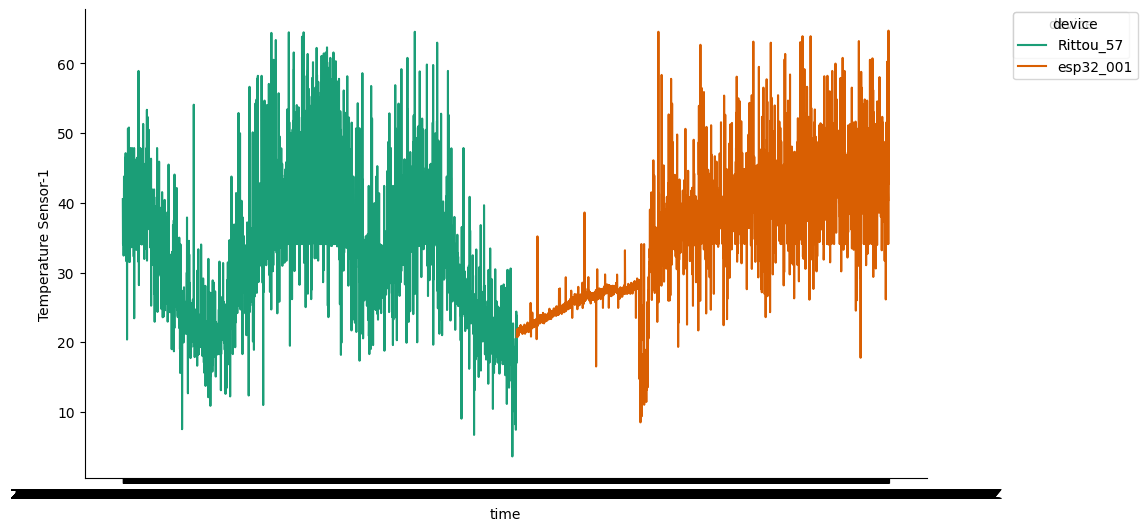

In [ ]:
# @title time vs Temperature Sensor-1
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['Temperature Sensor-1']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('device')):
  _plot_series(series, series_name, i)
  fig.legend(title='device', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('Temperature Sensor-1')

## Vibration sensor comparison


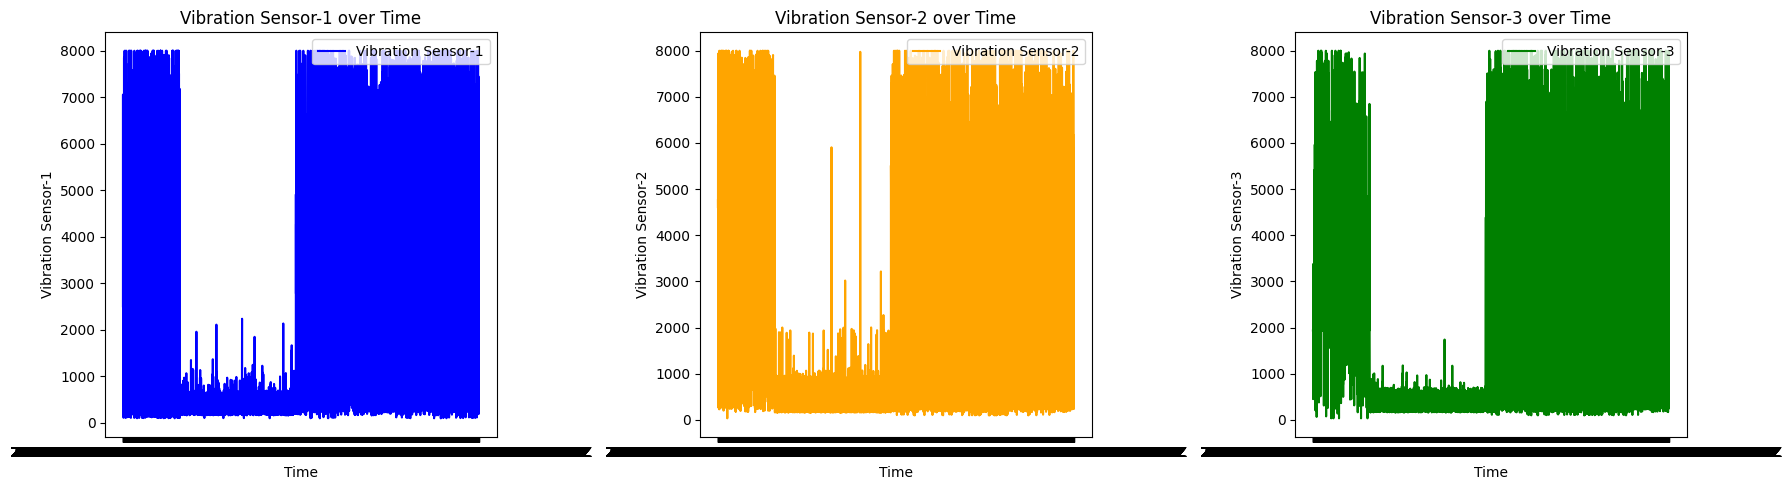

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plotting Vibration Sensor-1 data on the first subplot
axs[0].plot(data['time'], data['Vibration Sensor-1'], label='Vibration Sensor-1', color='blue')
axs[0].set_ylabel('Vibration Sensor-1')
axs[0].set_xlabel('Time')
axs[0].legend(loc='upper right')
axs[0].set_title('Vibration Sensor-1 over Time')
# Plotting Vibration Sensor-2 data on the first subplot
axs[1].plot(data['time'], data['Vibration Sensor-2'], label='Vibration Sensor-2', color='orange')
axs[1].set_ylabel('Vibration Sensor-2')
axs[1].set_xlabel('Time')
axs[1].legend(loc='upper right')
axs[1].set_title('Vibration Sensor-2 over Time')

axs[2].plot(data['time'], data['Vibration Sensor-3'], label='Vibration Sensor-3', color='green')
axs[2].set_ylabel('Vibration Sensor-3')
axs[2].set_xlabel('Time')
axs[2].legend(loc='upper right')
axs[2].set_title('Vibration Sensor-3 over Time')

plt.tight_layout()
plt.show()




### correlation between tempreature and value of three vibrations sensors.



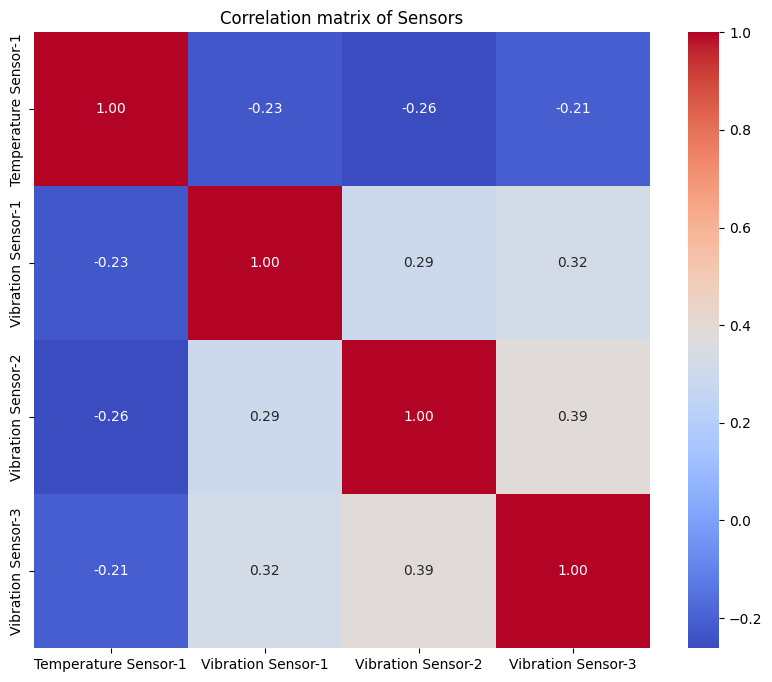

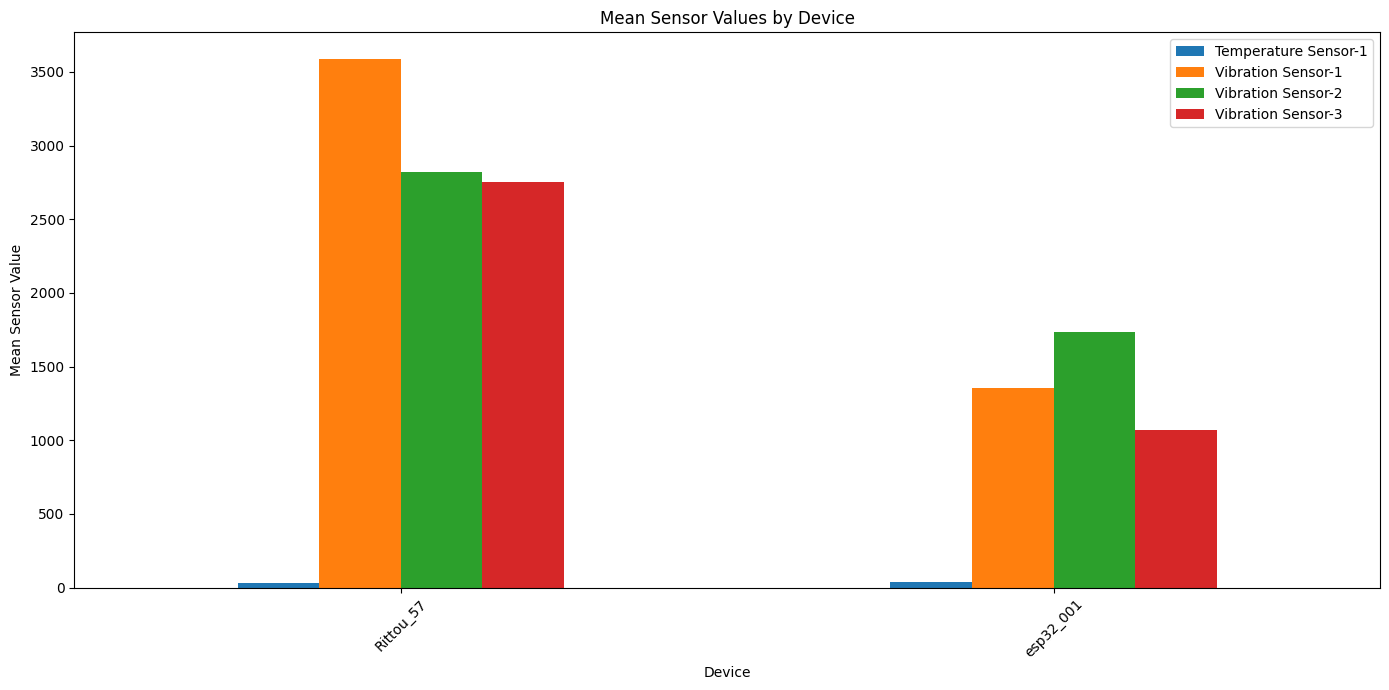

In [ ]:
# Program to find correlation between tempreature and vibration of three vibrations sensors.

data_copy = data.copy()
if 'time' in data_copy.columns and data_copy['time'].dtype == 'object':
    data_copy['time'] = pd.to_datetime(data_copy['time'], utc=True)

if 'time' in data_copy.columns:                                   # Set 'time' as the index of the copied DataFrame
    data_copy.set_index('time', inplace=True)

correlation_matrix = data[['Temperature Sensor-1', 'Vibration Sensor-1', 'Vibration Sensor-2', 'Vibration Sensor-3']].corr()# Calculatation of  correlation matrix


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True) #Plotting correlation matrix as heatmap
plt.title('Correlation matrix of Sensors')
plt.show()

# calculation and visualization the mean sensor values by device:
grouped_data = data.groupby('device')[['Temperature Sensor-1', 'Vibration Sensor-1', 'Vibration Sensor-2', 'Vibration Sensor-3']].mean()

# Plot the mean sensor values by device using bar plots
grouped_data.plot(kind='bar', figsize=(14, 7))
plt.title('Mean Sensor Values by Device')
plt.ylabel('Mean Sensor Value')
plt.xlabel('Device')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Comment: There is a negative correlation between 'Temperature Sensor-1' and all three vibration sensors with coefficients of -0.23, -0.26, and -0.21, respectively.Among the three vibarion sensors we see a weak positive correlation.

####                            ✅ End of data Pre-processing of data provided in Sheet 1


